### This Project is based on Baseball game to predict win for upcoming league their are several features which contributes to the winning count of this game ,these features are taken and analysed from Major Baseball league,2014 and as considered as the highest contributing features in order to have win count of this game.

In [1]:
# import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# read csv file and convert into dataframe
df = pd.read_csv('baseball.csv')
df.head()

,Wins,Runs,At Bats,Hits,Doubles,Triples,HomeRuns,Walks,Strikeouts,Stolen Bases,Runs Allowed,Earned Run,Earned Run Average,Complete Games,Shutouts,Saves,Errors
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


### Observations about dataset
Firstly, we explore the baseball dataset

- There are 16 different features that will be used as the inputs to the machine learning
- The output will be a value that represents the number of wins. 
- Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs,   Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors
- Output: Number of predicted wins (W)
- At bats: plate appearances, not including bases on balls, being hit by pitch, sacrifices, interference, or obstruction
- Hits: reaching base because of a batted, fair ball without error by the defense
- Doubles: hits on which the batter reaches second base safely without the contribution of a fielding error
- Triples: hits on which the batter reaches third base safely without the contribution of a fielding error
- Home runs: hits on which the batter successfully touched all four bases, without the contribution of a fielding error
- walks: hitter not swinging at four pitches called out of the strike zone and awarded first base.
- Strike out: number of times that a third strike is taken or swung at and missed, or bunted foul. Catcher must catch the third   strike or batter may attempt to run to first base.
- Stolen base: number of bases advanced by the runner while the ball is in the possession of the defense
- Earned run: number of runs that did not occur as a result of errors or passed balls
- Earned run average: total number of earned runs (see "ER" above), multiplied by 9, divided by innings pitched
- Complete game: number of games where player was the only pitcher for their team
- Shutout: number of complete games pitched with no runs allowed
- Save: number of games where the pitcher enters a game led by the pitcher's team, finishes the game without surrendering the     lead, is not the winning pitcher, and either (a) the lead was three runs or fewer when the pitcher entered the game; (b) the   potential tying run was on base, at bat, or on deck; or (c) the pitcher pitched three or more innings
- Errors: number of times a fielder fails to make a play he should have made with common effort, and the offense benefits as a   result
- Wins: number of games where pitcher was pitching while their team took the lead and went on to win, also the starter needs to   pitch at least 5 innings of work (also related: winning percentage)

In [3]:
# let's check the shape of the dataset
df.shape

(30, 17)

### We have 30 rows and 17 columns 

In [4]:
# let's check the missing values of a dataset
df.isna().sum()

Wins                  0
Runs                  0
At Bats               0
Hits                  0
Doubles               0
Triples               0
HomeRuns              0
Walks                 0
Strikeouts            0
Stolen Bases          0
Runs Allowed          0
Earned Run            0
Earned Run Average    0
Complete Games        0
Shutouts              0
Saves                 0
Errors                0
dtype: int64

### There is no null values present in this dataset

In [5]:
# summery about all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Wins                30 non-null     int64  
 1   Runs                30 non-null     int64  
 2   At Bats             30 non-null     int64  
 3   Hits                30 non-null     int64  
 4   Doubles             30 non-null     int64  
 5   Triples             30 non-null     int64  
 6   HomeRuns            30 non-null     int64  
 7   Walks               30 non-null     int64  
 8   Strikeouts          30 non-null     int64  
 9   Stolen Bases        30 non-null     int64  
 10  Runs Allowed        30 non-null     int64  
 11  Earned Run          30 non-null     int64  
 12  Earned Run Average  30 non-null     float64
 13  Complete Games      30 non-null     int64  
 14  Shutouts            30 non-null     int64  
 15  Saves               30 non-null     int64  
 16  Errors    

### all columns are having integer datatype except Earned Run Average

In [6]:
# let's check the duplicate rows present or not in this dataset
duplicate_rows = df[df.duplicated()]
print(duplicate_rows)

Empty DataFrame
Columns: [Wins, Runs, At Bats, Hits, Doubles, Triples, HomeRuns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Run, Earned Run Average, Complete Games, Shutouts, Saves, Errors]
Index: []


### There is no duplicates present in this dataset

In [7]:
# stats about data
df.describe()

,Wins,Runs,At Bats,Hits,Doubles,Triples,HomeRuns,Walks,Strikeouts,Stolen Bases,Runs Allowed,Earned Run,Earned Run Average,Complete Games,Shutouts,Saves,Errors
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


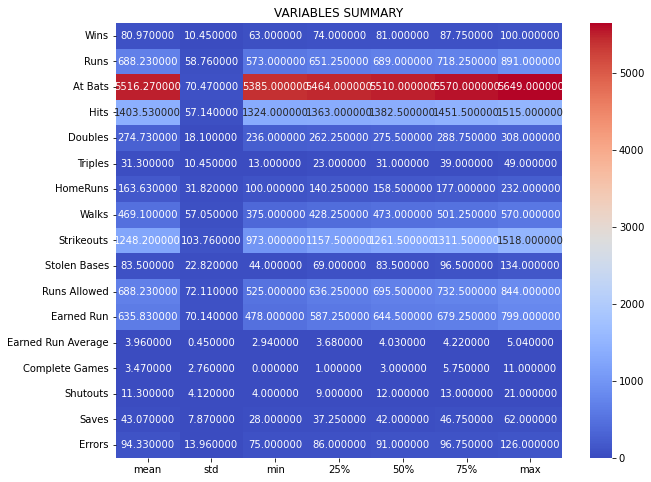

In [8]:
df.describe()
plt.figure(figsize=(10,8))
sns.heatmap(round(df.describe()[1:].transpose(),2),annot=True,fmt='f',cmap='coolwarm')
plt.xticks
plt.yticks
plt.title("VARIABLES SUMMARY")
plt.show()

***Observations****

**Runs(Mean-688.23,Std-58.76)data has found to be normally distributed for min to max(very less presence of outliers has been visualized)**

**At_Bats(Mean-5516.26,Std-70.46)data has found to be normally distributed for min to max(very less presence of outliers has been visualized)**

**Hits(Mean-1403.53,Std-57.14)data is not distibuted equally for min to max(presence of outliers on lower side has been visualized)**

**Doubles(Mean-274.73,Std-18.09)data is not distibuted equally for min to max(presence of outliers on lower side has been visualized)**

**Triples(Mean-31.30,Std=10.45)data is not distibuted equally for min to max(presence of outliers on lower side has been visualized)**

**Home_Runs(Mean-163.63,Std=31.82)data is not distibuted equally for min to max(presence of outliers on lower side has been visualized)**

**Walks(Mean-469.10,Std=57.05)data is not distibuted equally for min to 50%(No presence of Outliers has been visualized)**

**Strike_Out(Mean-1248.20,Std-103.75)Data has been visualized as normally distributed**

**Stolen_Basis(Mean-83.50,Std-22.81)Data has been visualized as normally distributed**

**Runs_allowed(Mean-688.23,Std-72.10)Data is not distibuted equally for min to max**

**Earned_Runs & Earned_runs_average(Data is distributed equally)**

**Shutouts & Start_Shutout(Data is distributed equally)**

**Saves & Errors(Data is found to be distributed equally)***

**Though Data distribution is looking satisfactory for maximum features but their is a bit of ambigousness present between some of them,lets understand with some deep insights of visualization**


## EDA

## Normal Distribution curve for every individual column

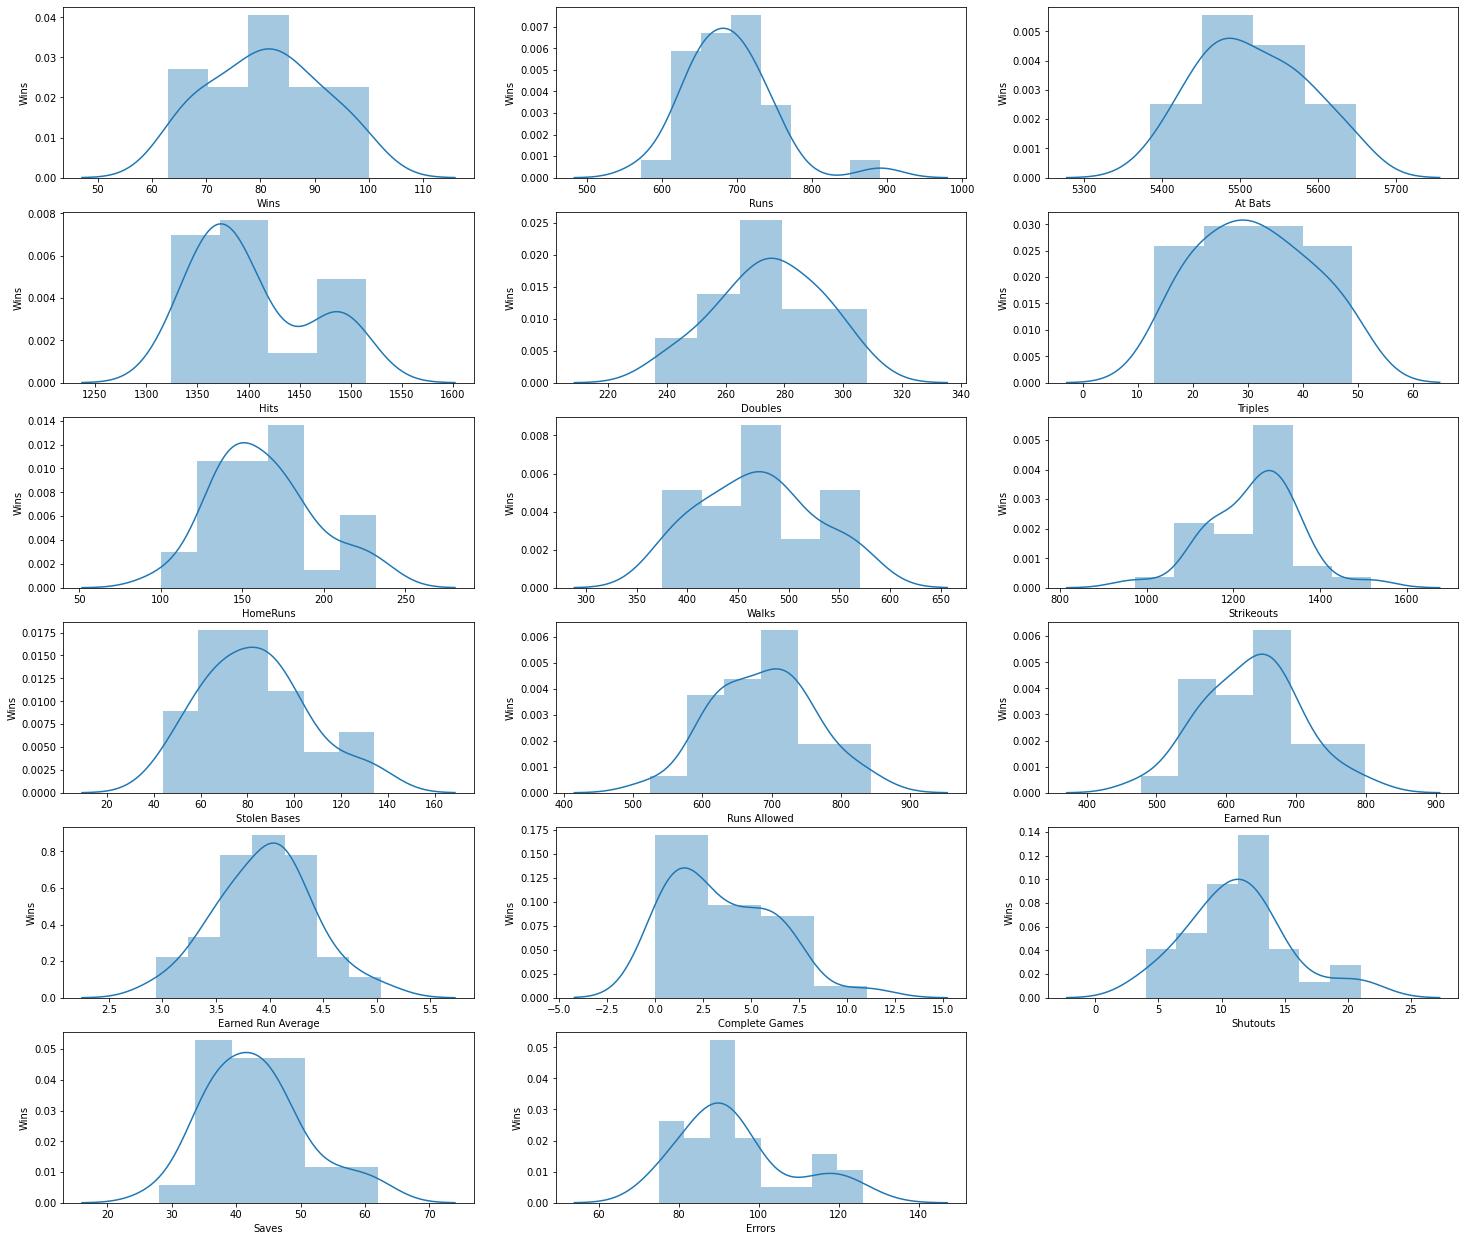

In [9]:
# let's visualize the data using distribution plot
plt.figure(figsize=(25,22))
pn = 1
for col in df:
    if pn <= 18:
        ax = plt.subplot(6,3,pn)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize = 10)
        plt.ylabel('Wins',fontsize = 10)
    pn +=1
plt.show()    

### According to my observation Errors,Shutouts,Saves,Earned Run and Runs are having outliers and all other columns are normally distributed. 

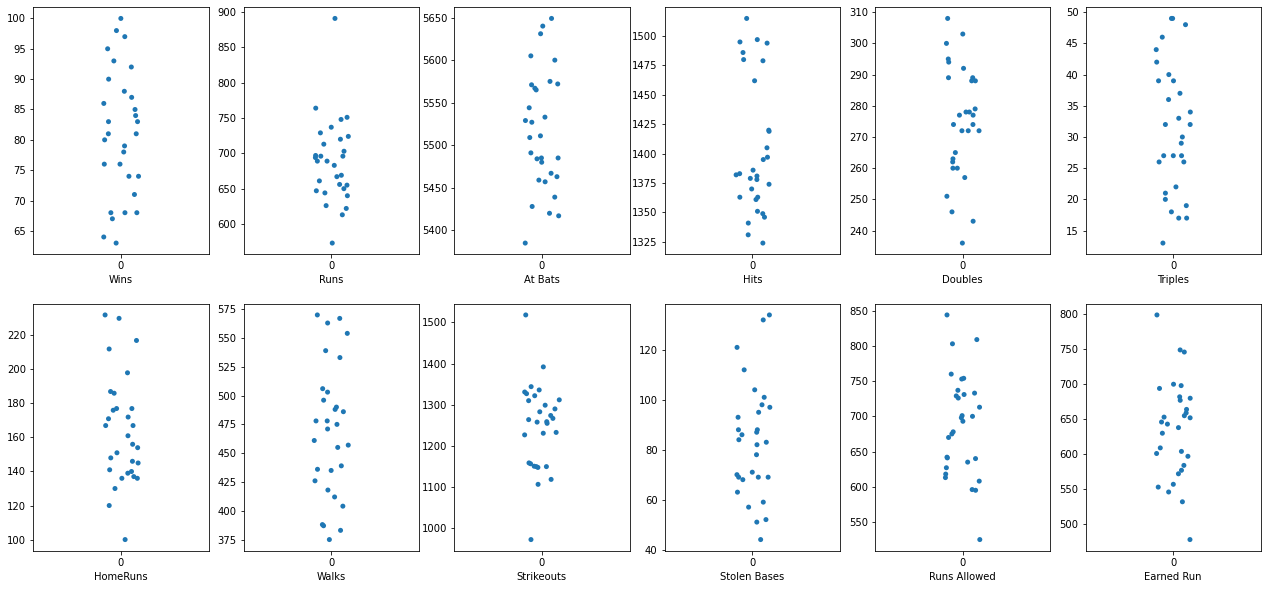

In [10]:
plt.figure(figsize=(22,10))
plotnumber=1
for column in df:
    if plotnumber<=12:
        plt.subplot(2,6,plotnumber)
        ax=sns.stripplot(data=df[column])
        plt.xlabel(column)
        
    plotnumber+=1
    
plt.show()   

**Observations**
- We can clearly see columns like Strike_out,Complete game are deviating from norma course which clearly indicates the presence of outliers in Dataset**

- Apart from this other columns are also indicating the presence of outliers on a ambiguous note**
                                     

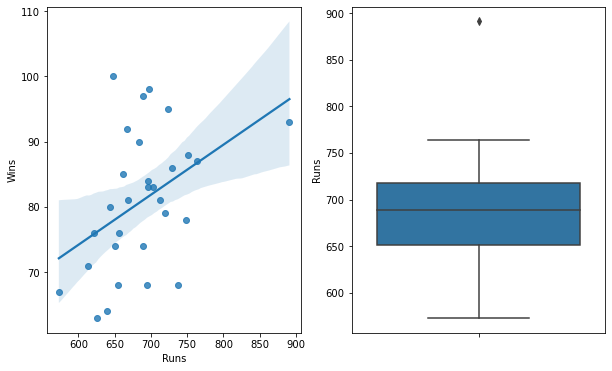

688.2333333333333


In [11]:
# Let's visualize the relationship between runs and wins using regplot and boxplot
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.regplot(x='Runs',y='Wins',data=df)
plt.subplot(1,2,2)
sns.boxplot(y='Runs',data=df)
plt.show()
print(df['Runs'].mean())

### In league matches Teams scoring is between 688 is considered as the average score for maximum wins, but winning chances at this score is highly correlated and outliers are also present  in this column


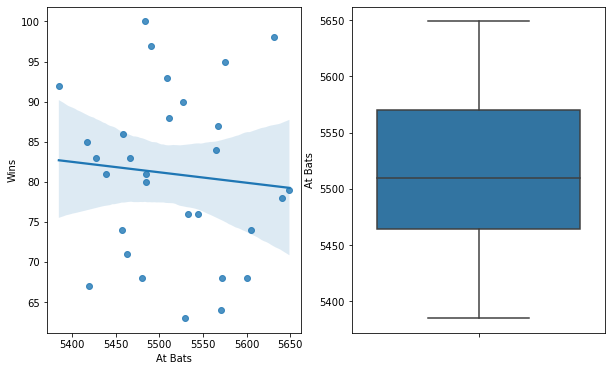

In [12]:
#Let's visualize the relationship between At Bats and wins using regplot and boxplot
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.regplot(x='At Bats',y='Wins',data=df)
plt.subplot(1,2,2)
sns.boxplot(y='At Bats',data=df)
plt.show()

### At Bats and wins are weakly correlated and outliers are not present in this column

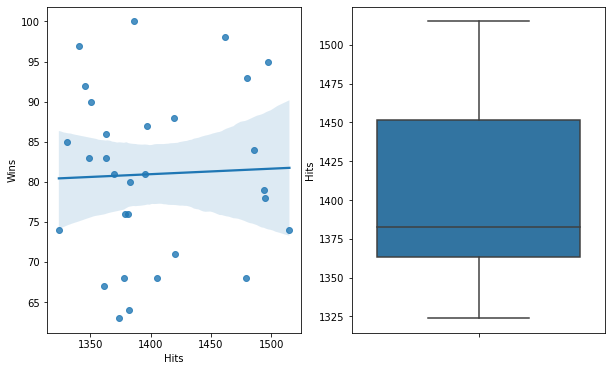

In [11]:
#Let's visualize the relationship between Hits and wins using regplot and boxplot
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.regplot(x='Hits',y='Wins',data=df)
plt.subplot(1,2,2)
sns.boxplot(y='Hits',data=df)
plt.show()

### Hits are also very weakly correlated with wins and outliers are not present in this column

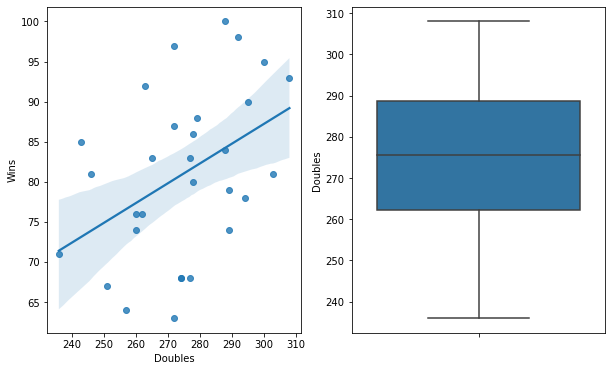

In [12]:
#Let's visualize the relationship between Doubles and wins using regplot and boxplot
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.regplot(x='Doubles',y='Wins',data=df)
plt.subplot(1,2,2)
sns.boxplot(y='Doubles',data=df)
plt.show()

**Observations**

**In League matches where hitters scoring above 280 doubles are amongst the top winning teams,here we need to nalyse trend of triples and compare them to see whether Doubles or Triples has been the key to attain count of WINS**

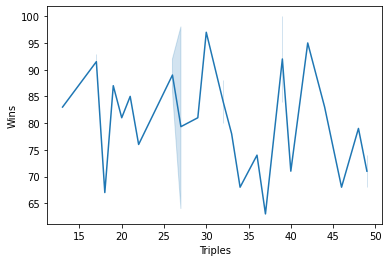

In [14]:
#Let's visualize the relationship between Triples and wins 
sns.lineplot(x='Triples',y='Wins',data=df)
plt.show()

**Observations**

***Hitters scoring around 30-34 triples on an average in a league matches is more likely to have a count of wins in their bucket**

**Hitters scoring between 37-45 triples are almost equal in count of wins buckets when compared with 30-34 triples**

**Hitters targeting doubles has more chances of taking WINS in their bucket**

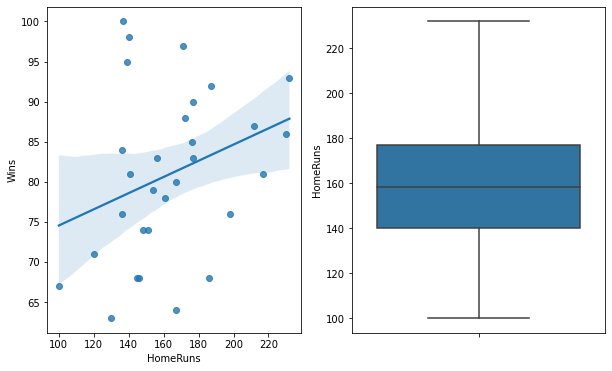

In [14]:
#Let's visualize the relationship between HomeRuns and wins using regplot and boxplot
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.regplot(x='HomeRuns',y='Wins',data=df)
plt.subplot(1,2,2)
sns.boxplot(y='HomeRuns',data=df)
plt.show()

### HomeRuns are positively correlated with wins and outliers are not present

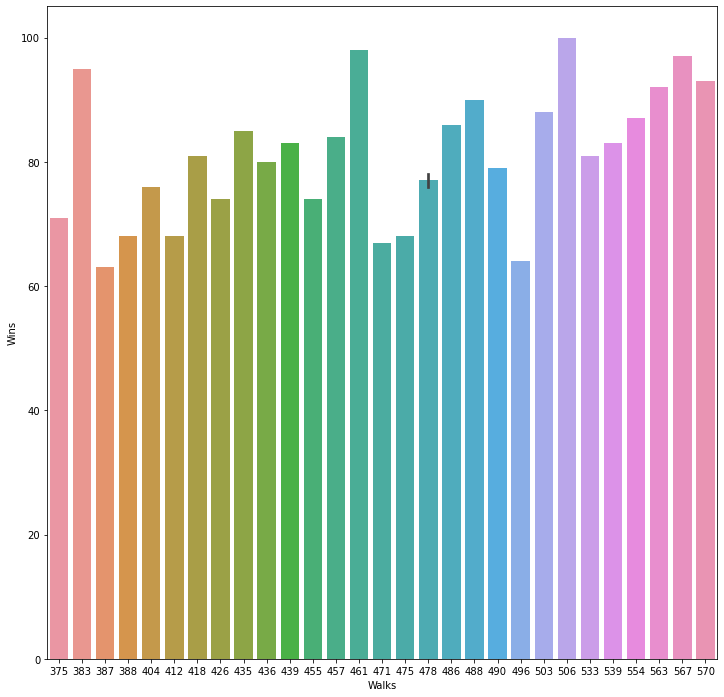

In [15]:
#Let's visualize the relationship between Walks and wins
plt.figure(figsize=(12,12))
sns.barplot(x="Walks", y="Wins", data=df)
plt.show()

**Observations**
**Hitters of teams having maximum wins are generating maximum walks are directly contributing for winning**

**On an average in the begining-mid-end same trend has been observed from hitters and it also takes us to conclusion that walks have been the average contributor for wins in this game**
                                       

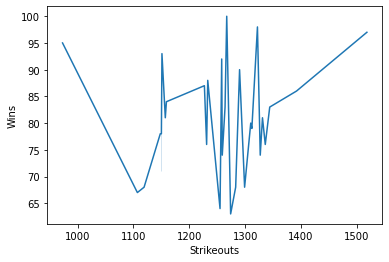

In [16]:
#Let's visualize the relationship between Strikeouts and wins 
sns.lineplot(x='Strikeouts',y='Wins',data=df)
plt.show()

**Observations**
                                     
**Pitchers throwing strike_outs are directly impacting positively on their team winning bucket maximum Strike_Out have been noticed around 1270 - 1300 this range specifies the maximum wins**                                     

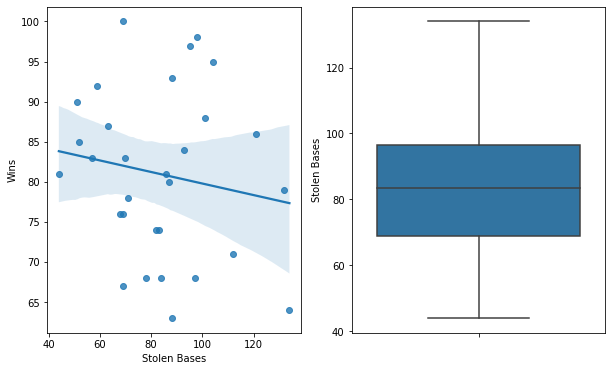

In [17]:
#Let's visualize the relationship between Stolen Bases and wins using regplot and boxplot
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.regplot(x='Stolen Bases',y='Wins',data=df)
plt.subplot(1,2,2)
sns.boxplot(y='Stolen Bases',data=df)
plt.show()

### Stolen Bases are lightly correlated with wins and outliers are not present in this column

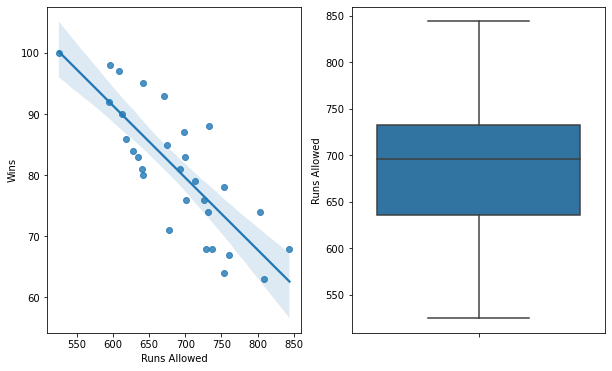

In [18]:
#Let's visualize the relationship between Runs Allowed and wins using regplot and boxplot
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.regplot(x='Runs Allowed',y='Wins',data=df)
plt.subplot(1,2,2)
sns.boxplot(y='Runs Allowed',data=df)
plt.show()

### Runs Allowed highly correlated with wins and no outliers present

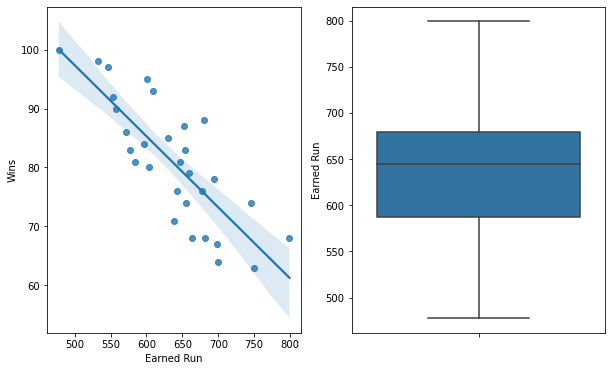

In [19]:
#Let's visualize the relationship between Earned Run and wins using regplot and boxplot
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.regplot(x='Earned Run',y='Wins',data=df)
plt.subplot(1,2,2)
sns.boxplot(y='Earned Run',data=df)
plt.show()

### Earned Run is highly correlated with wins and no outliers are present

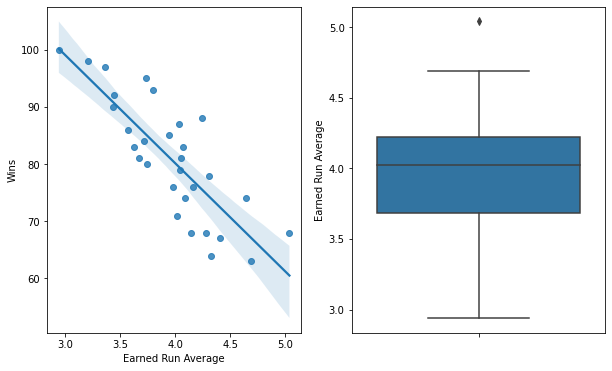

In [20]:
#Let's visualize the relationship between Earned Run Average and wins using regplot and boxplot
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.regplot(x='Earned Run Average',y='Wins',data=df)
plt.subplot(1,2,2)
sns.boxplot(y='Earned Run Average',data=df)
plt.show()

### Earned Run Average is also highly correlated with wins and outliers are present in this column

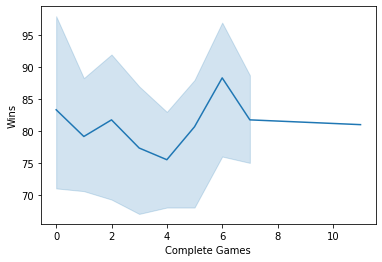

In [17]:
#Let's visualize the relationship between Complete Games and wins 
sns.lineplot(x='Complete Games',y='Wins',data=df)
plt.show()

**Pitchers has been focused on Shutouts in entire league which has been looking as key for pitchers for winning games** 

**On an average Teams 6 shutouts as in total are having maximum chance of winning**

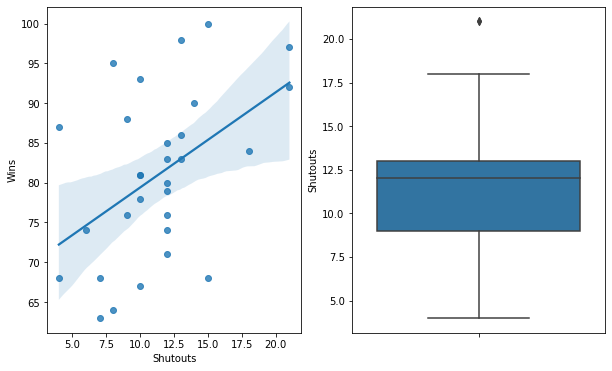

In [22]:
#Let's visualize the relationship between Shutouts and wins using regplot and boxplot
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.regplot(x='Shutouts',y='Wins',data=df)
plt.subplot(1,2,2)
sns.boxplot(y='Shutouts',data=df)
plt.show()

### Shutouts are positively correlated with wins and outliers are also present

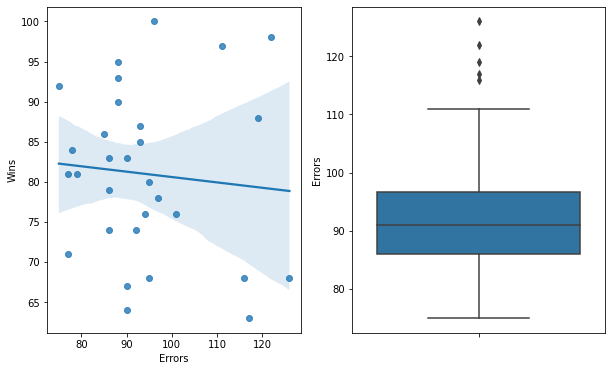

In [23]:
#Let's visualize the relationship between Errors and wins using regplot and boxplot
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.regplot(x='Errors',y='Wins',data=df)
plt.subplot(1,2,2)
sns.boxplot(y='Errors',data=df)
plt.show()

### Errors primarily are taken in controll as misplay from ball is ranging in 88-90 hence error are contributing in other Team win.We can clearly visualize a good controll of teams on errors part and directly contributing to their Win

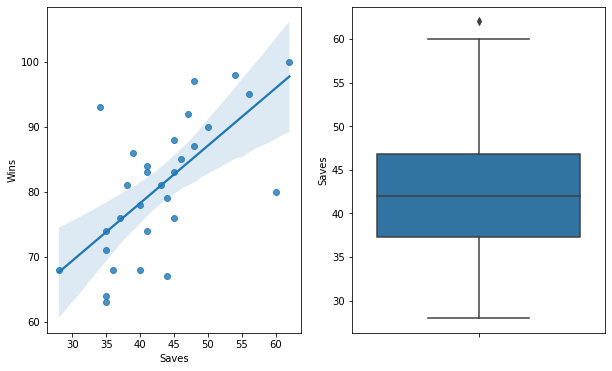

In [24]:
#Let's visualize the relationship Saves and wins using regplot and boxplot
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.regplot(x='Saves',y='Wins',data=df)
plt.subplot(1,2,2)
sns.boxplot(y='Saves',data=df)
plt.show()

### Saves are highly correlated with wins and outliers are also present in this column

## Removing Outliers

### Z- score technique

In [16]:
from scipy.stats import zscore

In [17]:
z_score = zscore(df[['Errors','Shutouts','Saves','Earned Run Average','Runs']])

In [18]:
z= np.abs(z_score)

In [19]:
filtering_entry = (z<3).all(axis = 1)

In [20]:
df = df[filtering_entry]

In [21]:
df.shape

(29, 17)

## Percentage data loss


In [22]:
loss_percent = (30-29)/30*100
print(loss_percent,'%')

3.3333333333333335 %


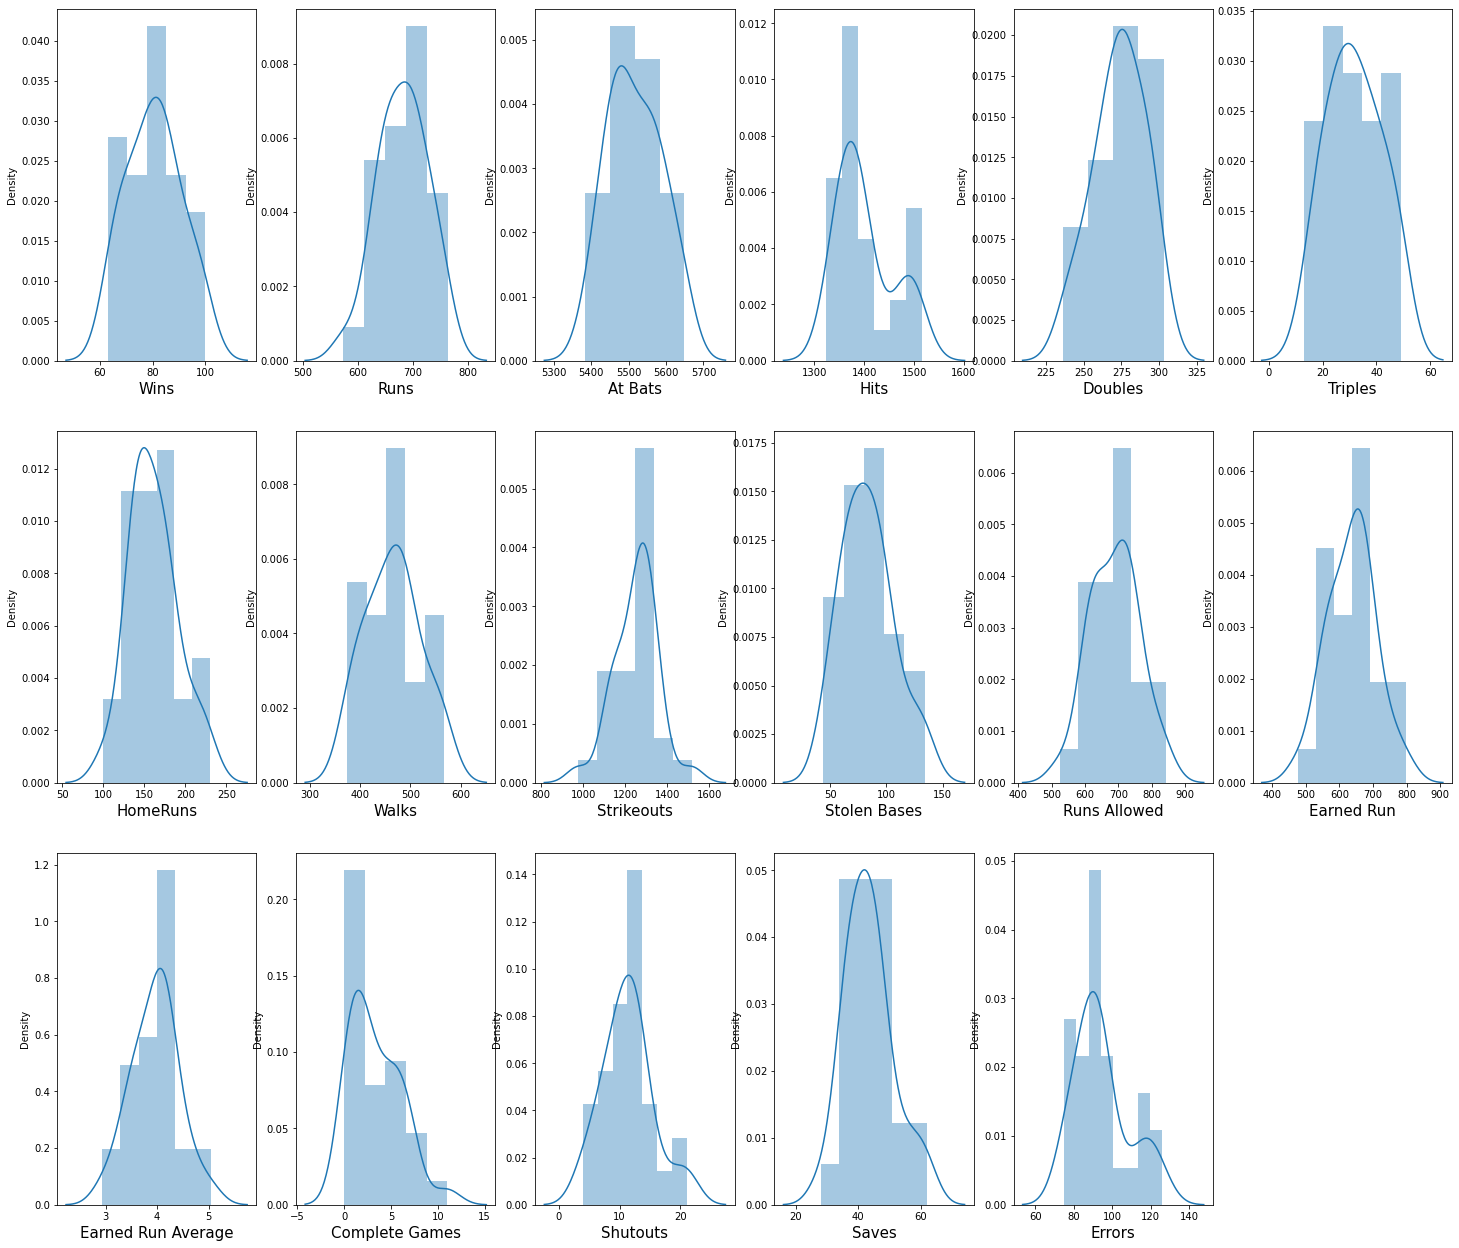

In [23]:
# let's visualize the data after removing outliers
plt.figure(figsize = (25,22))
pn = 1
for col in df:
    if pn <= 18:
        plt.subplot(3,6,pn)
        ax=sns.distplot(df[col])
        plt.xlabel(col,fontsize= 15)
    pn += 1
plt.show()    

### Now, looks better after removing the outliers

## Correlation

In [24]:
# let's check the correlation
df.corr()

,Wins,Runs,At Bats,Hits,Doubles,Triples,HomeRuns,Walks,Strikeouts,Stolen Bases,Runs Allowed,Earned Run,Earned Run Average,Complete Games,Shutouts,Saves,Errors
Wins,1.000000,0.390451,-0.085780,-0.018360,0.384886,-0.206737,0.245697,0.447513,0.156469,-0.169503,-0.823176,-0.815308,-0.826952,0.029594,0.497526,0.749290,-0.072858
Runs,0.390451,1.000000,0.438022,0.433525,0.469293,0.134204,0.586894,0.258450,0.081158,0.075323,-0.013858,0.007727,-0.009122,0.101438,-0.085108,0.061381,0.043123
At Bats,-0.085780,0.438022,1.000000,0.769159,0.490752,0.445604,-0.064653,-0.137850,-0.111243,0.373674,0.315499,0.309146,0.254872,-0.078511,-0.198872,-0.113342,0.316297
Hits,-0.018360,0.433525,0.769159,1.000000,0.528016,0.582024,-0.218711,-0.222271,-0.371861,0.417877,0.244606,0.280571,0.256458,0.092577,-0.135116,-0.079814,-0.011945
Doubles,0.384886,0.469293,0.490752,0.528016,1.000000,0.342419,-0.098695,0.211243,-0.096772,0.194308,-0.215196,-0.224993,-0.248212,0.244856,0.084060,0.269999,0.145032
Triples,-0.206737,0.134204,0.445604,0.582024,0.342419,1.000000,-0.369299,-0.404852,-0.196586,0.483818,0.312750,0.333731,0.325883,-0.003733,-0.058896,-0.210627,0.108610
HomeRuns,0.245697,0.586894,-0.064653,-0.218711,-0.098695,-0.369299,1.000000,0.336814,0.479914,-0.166072,-0.092586,-0.062094,-0.070756,0.065978,0.005546,0.066984,-0.189790
Walks,0.447513,0.258450,-0.137850,-0.222271,0.211243,-0.404852,0.336814,1.000000,0.315566,-0.117622,-0.425381,-0.455832,-0.465794,0.417437,0.473922,0.187101,-0.050114
Strikeouts,0.156469,0.081158,-0.111243,-0.371861,-0.096772,-0.196586,0.479914,0.315566,1.000000,0.038188,-0.140570,-0.177655,-0.195362,-0.053075,0.231230,0.091394,0.142740
Stolen Bases,-0.169503,0.075323,0.373674,0.417877,0.194308,0.483818,-0.166072,-0.117622,0.038188,1.000000,0.134315,0.146243,0.128848,-0.030708,-0.104602,-0.179741,0.082702


In [28]:
# let's check the correation with Wins
df.corr()['Wins'].sort_values

<bound method Series.sort_values of Wins                  1.000000
Runs                  0.390451
At Bats              -0.085780
Hits                 -0.018360
Doubles               0.384886
Triples              -0.206737
HomeRuns              0.245697
Walks                 0.447513
Strikeouts            0.156469
Stolen Bases         -0.169503
Runs Allowed         -0.823176
Earned Run           -0.815308
Earned Run Average   -0.826952
Complete Games        0.029594
Shutouts              0.497526
Saves                 0.749290
Errors               -0.072858
Name: Wins, dtype: float64>

<AxesSubplot:>

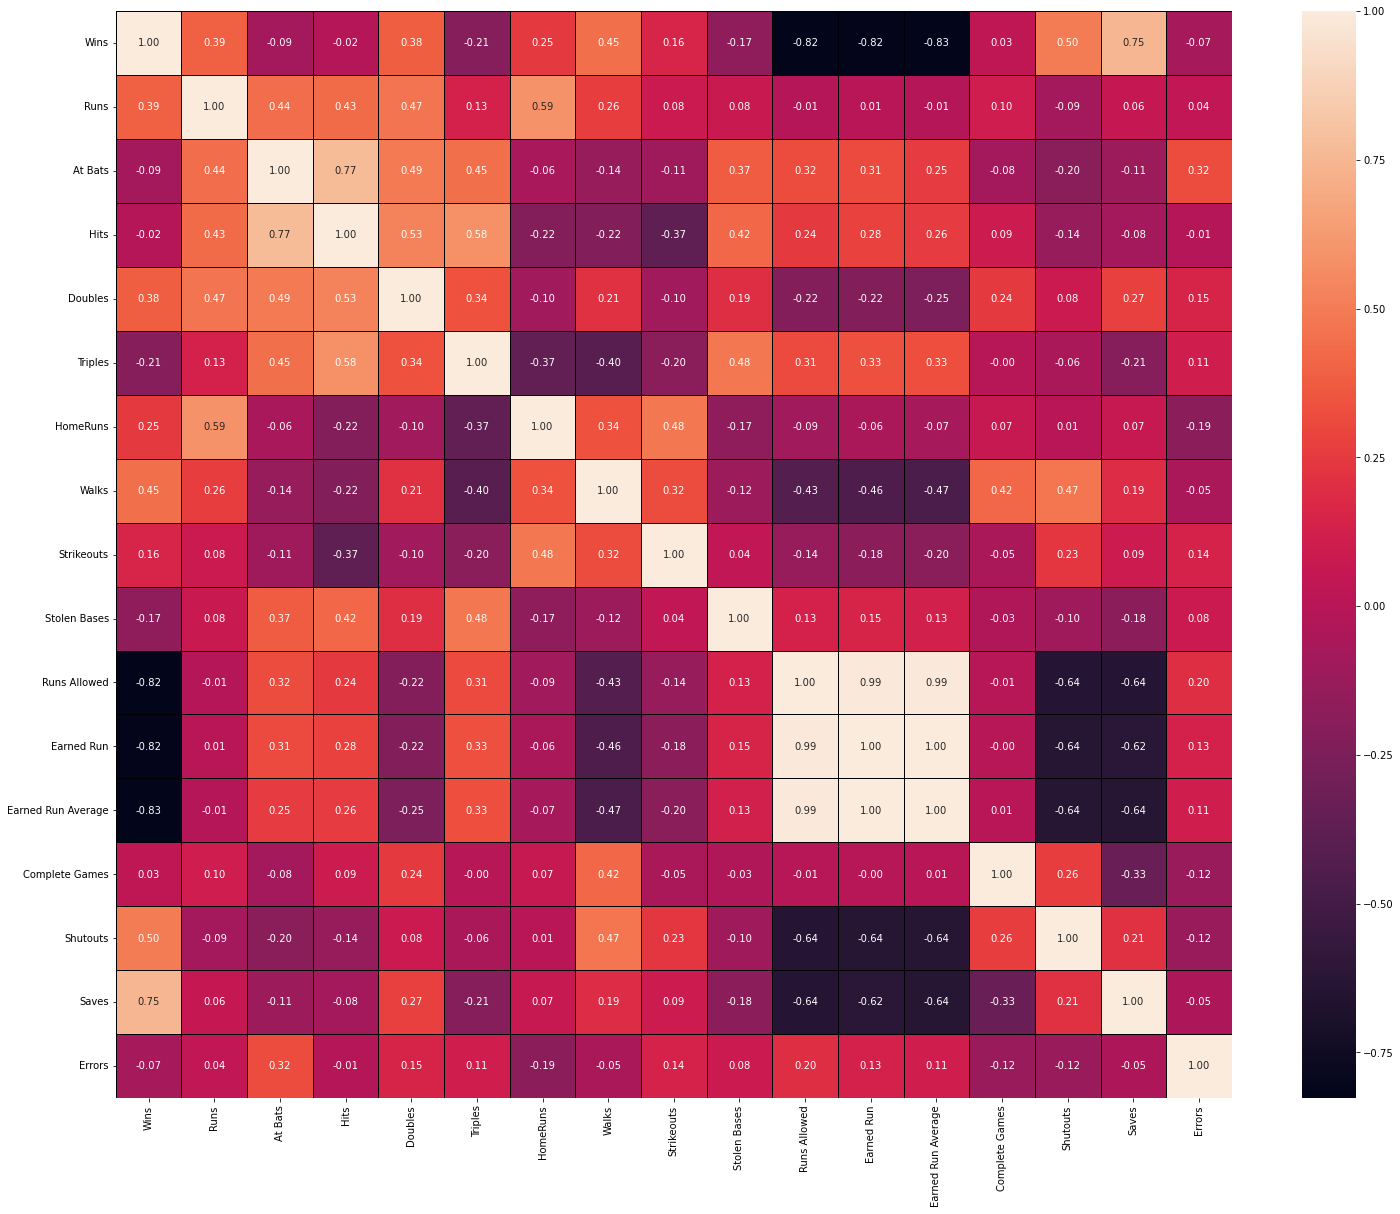

In [29]:
# let's check correlation using heatmap
plt.figure(figsize=(25,20))
sns.heatmap(df.corr(),annot =True,linewidth = 0.5,linecolor = 'black',fmt  = '.2f')

### Observations:-

- Runs, home runs, Saves, Shutouts, and Walks are highly positively correlated with wins.
- Stolen Bases, Runs Allowed, Earned Runs and Earned Runs Average are highly negatively correlated with wins.
- The remaining features have less correlation with Wins.
- Multicollinearity problem also exist in Runs Allowed, Earned Runs and Earned Run Average.
- maximum correlation : Saves
- minimum correlation : Hits

In [33]:
Collinearity_features = df[['Earned Run','Earned Run Average','Runs Allowed']]
Collinearity_features.head(2)

,Earned Run,Earned Run Average,Runs Allowed
0,601,3.73,641
1,653,4.07,700


<AxesSubplot:xlabel='Runs Allowed', ylabel='Earned Run'>

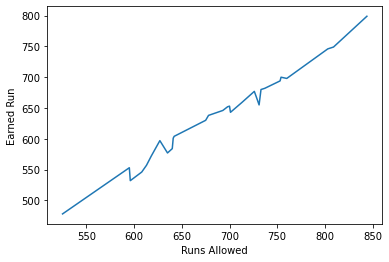

In [34]:
sns.lineplot(x='Runs Allowed',y='Earned Run',data=Collinearity_features)

**Positive trend has been visualized and now through visualizing the trend we can conclude a clear sign of Multi-Collinearity**                                                
**Visualizing through heatmap has also indicated the same though realistically it is making average sense for having correlation between these features**                                                

<AxesSubplot:xlabel='Runs Allowed', ylabel='Earned Run Average'>

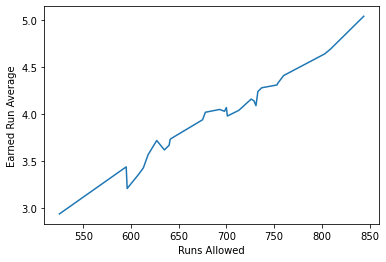

In [35]:
sns.lineplot(x='Runs Allowed',y='Earned Run Average',data=Collinearity_features)

**Positive trend has been visualized and now through visualizing the trend we can conclude a clear sign of Multi-Collinearity**

<AxesSubplot:xlabel='Earned Run', ylabel='Earned Run Average'>

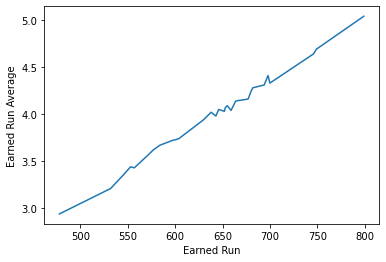

In [36]:
sns.lineplot(x='Earned Run',y='Earned Run Average',data=Collinearity_features)

**Positive trend has been visualized and now through visualizing the trend we can conclude a clear sign of Multi-Collinearity**

# Correlation Check


<AxesSubplot:>

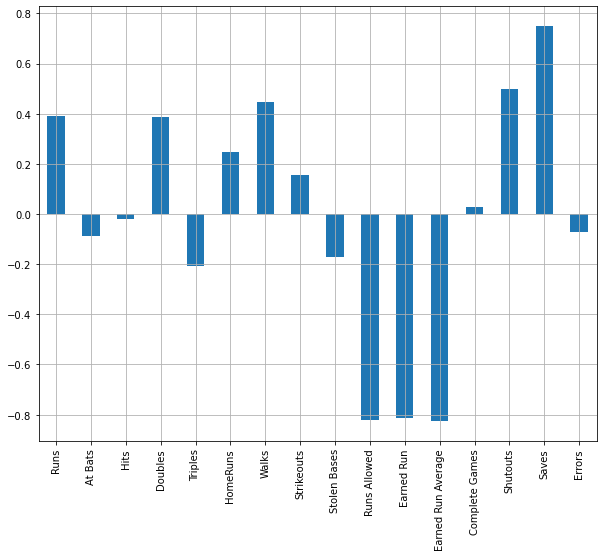

In [39]:
df.drop('Wins',axis=1).corrwith(df.Wins).plot(kind='bar',grid=True,figsize=(10,8))

**Earned_Runs  and Earned _runs_avg are negatively correlated with Target variable we have visualized the Multi-Collinearity problem in these features we are going to drop these features**                                


In [42]:
# drop the unnecessary column those are having multicollinearity problem exist
df.drop(columns=['Runs Allowed','Earned Run'],axis = 1,inplace = True)
df.head()

,Wins,Runs,At Bats,Hits,Doubles,Triples,HomeRuns,Walks,Strikeouts,Stolen Bases,Earned Run Average,Complete Games,Shutouts,Saves,Errors
0,95,724,5575,1497,300,42,139,383,973,104,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,4.64,7,12,35,86


### Dividing data in features and label

In [43]:
x = df.drop('Wins',axis = 1)
x

,Runs,At Bats,Hits,Doubles,Triples,HomeRuns,Walks,Strikeouts,Stolen Bases,Earned Run Average,Complete Games,Shutouts,Saves,Errors
0,724,5575,1497,300,42,139,383,973,104,3.73,2,8,56,88
1,696,5467,1349,277,44,156,439,1264,70,4.07,2,12,45,86
2,669,5439,1395,303,29,141,533,1157,86,3.67,11,10,38,79
3,622,5533,1381,260,27,136,404,1231,68,3.98,7,9,37,101
4,689,5605,1515,289,49,151,455,1259,83,4.64,7,12,35,86
6,764,5567,1397,272,19,212,554,1227,63,4.03,3,4,48,93
7,713,5485,1370,246,20,217,418,1331,44,4.05,0,10,43,77
8,644,5485,1383,278,32,167,436,1310,87,3.74,1,12,60,95
9,748,5640,1495,294,33,161,478,1148,71,4.31,3,10,40,97
10,751,5511,1419,279,32,172,503,1233,101,4.24,5,9,45,119


In [44]:
y = df['Wins']
y

0      95
1      83
2      81
3      76
4      74
6      87
7      81
8      80
9      78
10     88
11     86
12     85
13     76
14     68
15    100
16     98
17     97
18     68
19     64
20     90
21     83
22     71
23     67
24     63
25     92
26     84
27     79
28     74
29     68
Name: Wins, dtype: int64

In [45]:
# data scaling formula z = (x-mean)/std
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled= scaler.fit_transform(x)
x_scaled

array([[ 0.95939835,  0.83008422,  1.73830631,  1.55653766,  1.01084549,
        -0.76586314, -1.53635899, -2.72762331,  0.9059529 , -0.51138828,
        -0.50148589, -0.81326172,  1.64315663, -0.47109143],
       [ 0.33114717, -0.70283074, -0.93869788,  0.20117132,  1.20891656,
        -0.18138864, -0.49502051,  0.12189552, -0.58531515,  0.23895226,
        -0.50148589,  0.15929869,  0.21100645, -0.61489829],
       [-0.27466646, -1.10025314, -0.10665604,  1.73332457, -0.2766165 ,
        -0.69710144,  1.25294051, -0.9258657 ,  0.11645805, -0.64380131,
         2.85461197, -0.32698152, -0.70036184, -1.1182223 ],
       [-1.32923093,  0.23395062, -0.35988616, -0.8006212 , -0.47468758,
        -0.8690057 , -1.14585706, -0.20124579, -0.6730368 ,  0.04033271,
         1.36301292, -0.57012162, -0.83055731,  0.46365315],
       [ 0.17408438,  1.25589393,  2.0638879 ,  0.90831897,  1.70409425,
        -0.35329291, -0.19749523,  0.07293472, -0.01512442,  1.4968761 ,
         1.36301292,  0.15

## Applying PCA for removal of Curse of Dimensionality

In [46]:
from sklearn.decomposition import PCA

In [47]:
pca = PCA(n_components=14, svd_solver="full")
x = pd.DataFrame(pca.fit_transform(x), columns=x.columns)
x.head(2)

,Runs,At Bats,Hits,Doubles,Triples,HomeRuns,Walks,Strikeouts,Stolen Bases,Earned Run Average,Complete Games,Shutouts,Saves,Errors
0,312.321322,3.606774,10.952856,46.869955,-11.400003,13.673142,-14.183821,17.226304,-6.124794,-10.017150,3.363620,-1.290331,1.253899,-0.003617
1,-33.465188,51.855058,-11.865524,36.307464,8.729287,-1.050951,-26.849921,9.271020,22.016477,0.666225,5.793907,-0.074578,0.593959,-0.275955


**Removal of skewness using Power Transformer as values are negative we are using 'yeo-johnson' method for same**

In [49]:
from sklearn.preprocessing import PowerTransformer
p_transform = PowerTransformer(method = 'yeo-johnson')
x = pd.DataFrame(p_transform.fit_transform(x), columns=x.columns)
x.head(10)

,Runs,At Bats,Hits,Doubles,Triples,HomeRuns,Walks,Strikeouts,Stolen Bases,Earned Run Average,Complete Games,Shutouts,Saves,Errors
0,2.713842,0.030892,0.233104,1.198773,-0.302380,0.804650,-0.808438,1.392614,-0.697965,-1.674975,0.597508,-0.399966,0.903926,0.026953
1,-0.279415,0.607790,-0.189569,0.968551,0.436506,0.138592,-1.545975,0.841780,2.341025,0.283650,0.978583,-0.006910,0.574027,-1.402213
2,0.477116,1.104699,1.517100,-0.748040,-1.503981,0.316268,-0.681452,1.437115,0.176957,1.382127,-2.034654,1.010336,1.090603,1.100374
3,0.303663,0.373610,-1.455590,-0.521269,1.093365,-0.663072,0.356977,-0.099881,0.139852,0.429204,-1.041599,-0.319578,2.167024,1.511281
4,0.541801,-1.407633,-0.375181,-0.466890,-1.585647,-2.193726,1.122167,0.007446,0.200466,1.662333,0.308673,0.667107,0.131947,-0.341786
5,0.110735,-0.699502,2.142099,0.658126,1.524200,0.327974,0.686765,-0.485977,0.341816,-1.123491,0.138192,2.305694,0.641914,0.825574
6,-0.791715,0.021540,-0.519797,2.010321,0.801563,-1.479853,1.527587,-0.303648,0.670136,-0.669612,-0.194632,-0.400656,-0.501673,0.450293
7,-0.534059,0.249437,-0.922673,0.124917,-0.299867,0.015939,0.192850,1.408115,-1.926952,-0.565216,1.449734,0.388450,0.292464,-0.881219
8,1.347741,-1.368419,0.947898,0.269905,0.639844,-1.233013,0.046143,-0.254570,0.369040,0.133768,-0.818192,-0.107923,-1.183708,-0.758172
9,0.150821,-0.325285,1.187455,0.816156,-0.437392,1.064043,-1.670074,-2.070770,-1.415942,-0.242500,0.080666,0.427608,0.946155,-1.208049


**Final features Multi-Collinearity Check using VIF**

In [51]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["Features List"]=x.columns
vif_data["VIF Value"]=[variance_inflation_factor(x.values, i)
                          for i in range(len(x.columns))]
vif_data

,Features List,VIF Value
0,Runs,1.005948
1,At Bats,1.006980
2,Hits,1.005896
3,Doubles,1.006822
4,Triples,1.010728
5,HomeRuns,1.029341
6,Walks,1.014343
7,Strikeouts,1.007296
8,Stolen Bases,1.007609
9,Earned Run Average,1.021850


**No sign of Multi-collinearity**

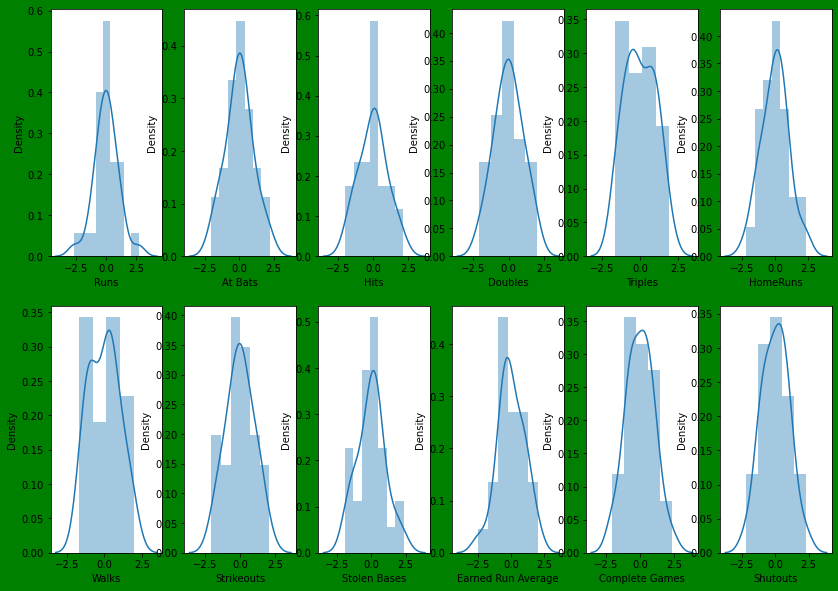

In [52]:
plt.figure(figsize=(14,10),facecolor='green')
plotnumber=1
for column in x:
    if plotnumber<=12:
        plt.subplot(2,6,plotnumber)
        ax=sns.distplot(x[column])
        plt.xlabel(column)
        
    plotnumber+=1
    
plt.show()    

**No sign of skewness has been visualized even the use of Transformer and removal of outliers had made sure that we have maximum coverage of data i.e. b/w +-3STD**

**Dataset is normally distributed**

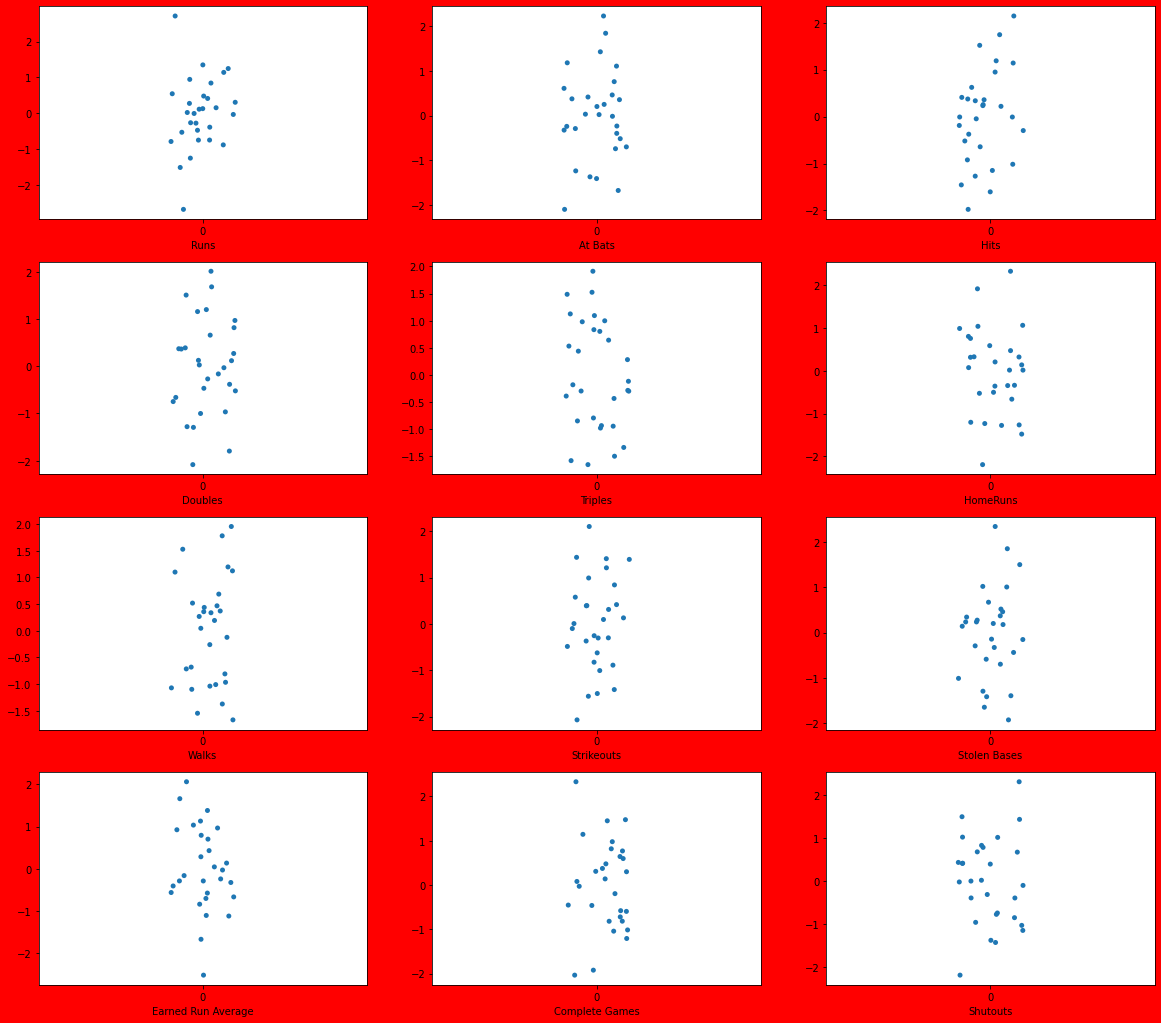

In [53]:
plt.figure(figsize=(20,18),facecolor='red')
plotnumber=1
for column in x:
    if plotnumber<=12:
        plt.subplot(4,3,plotnumber)
        ax=sns.stripplot(data=x[column])
        plt.xlabel(column)
        
    plotnumber+=1
    
plt.show()   

**Dataset is ready for further processing as we have Removed outliers,applied PCA for dimensionality reduction and Skewness has also been controlled for all features with visualization and comparison with above figure of stripplot we can clearly visualize the difference and hereby we can say our Dataset is ready for Model Building**                                              

# Model Building


## Best Random State

In [54]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [184]:
# maximum accuracy
max_accu = 0
# best random state value for which max accuracy is achived
max_rs = 0
for i in range(1,400):
    x_train,x_test,y_train,y_test= train_test_split(x,y,test_size =0.20,random_state = i) 
    gbr = GradientBoostingRegressor()
    gbr.fit(x_train,y_train)
    y_pred = gbr.predict(x_train)
    score1 = r2_score(y_train,y_pred)
    pred = gbr.predict(x_test)
    score=r2_score(y_test,pred)
    print('training score',score1,'testing score',score,'random state',i)
    if (score and score1) > max_accu:
        max_accu = score
        max_rs = i
        print('testing score',score,'random state',i)
    

training score 0.999999340916537 testing score 0.6315234593262955 random state 1
testing score 0.6315234593262955 random state 1
training score 0.9999996111702923 testing score 0.38318571600227647 random state 2
testing score 0.38318571600227647 random state 2
training score 0.9999999800865557 testing score 0.49042484455639646 random state 3
testing score 0.49042484455639646 random state 3
training score 0.9999999039766646 testing score 0.12608191638880428 random state 4
testing score 0.12608191638880428 random state 4
training score 0.9999996275188741 testing score 0.6874704233545718 random state 5
testing score 0.6874704233545718 random state 5
training score 0.9999987572263933 testing score 0.6900909345538656 random state 6
testing score 0.6900909345538656 random state 6
training score 0.9999998527968924 testing score 0.04898992753558684 random state 7
testing score 0.04898992753558684 random state 7
training score 0.9999993579596308 testing score 0.5315318928388233 random state 8
t

In [55]:
# create empty lists
training_score=[]
testing_score=[]
cross_val_score = []

## Train Test Split

In [56]:
#split data into train and test, model will be build on training data and tested on test data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.20,random_state = 335)


##  Model building using Linear Regression


In [57]:
# creating object for LinearRegression model
lr = LinearRegression()
lr.fit(x_train,y_train)
# let's check how well model fit on train data
lr.score(x_train,y_train)
# let's check how well model fits on test data
lr.score(x_test,y_test)
# predict the training score
x_pred=lr.predict(x_train)
training_score_lr=r2_score(y_train,x_pred)
training_score.append(training_score_lr)
print("Traing score of Linear Regression",training_score_lr)
# predict the model
y_pred = lr.predict(x_test)
testing_score_lr = r2_score(y_test,y_pred)
testing_score.append(testing_score_lr)
print("Testing score of linear Regression",testing_score_lr)

Traing score of Linear Regression 0.944553917325024
Testing score of linear Regression 0.8245885704926905


### After setting the random state = 335 , We got the accuracy score is 82%

## Cross validation for LinearRegression

In [58]:
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV
Lassocv=LassoCV(max_iter=300,normalize=True)
Lassocv.fit(x_train,y_train)
alpha_num = Lassocv.alpha_
lasso_reg = Lasso(alpha_num)
lasso_reg.fit(x_train,y_train)
lasso_reg.score(x_train,y_train)
cross_val_score_lr =lasso_reg.score(x_test,y_test)
cross_val_score.append(cross_val_score_lr)
print('Testing score',cross_val_score_lr)

Testing score 0.8143258496448883


### Difference between model accuracy and cross validation accuracy score is 1

### Lets check overall error of Model using MAE,MSE,RMSE

In [59]:
print("Mean Absolute Error is=====",mean_absolute_error(y_test,y_pred))
print("Mean squared error is======",mean_squared_error(y_test,y_pred))
print("Root mean squared error===",np.sqrt(7.430695812966166))

Mean Absolute Error is===== 4.272230465312492
Mean squared error is====== 19.144208514839416
Root mean squared error=== 2.7259302656095525


##  Model building using Random Forest

In [60]:
#split data into train and test, model will be build on training data and tested on test data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.20,random_state = 163)


In [61]:
from sklearn.ensemble import RandomForestRegressor
# initiate the object for random forest
rf = RandomForestRegressor()
# model training
rf.fit(x_train,y_train)
training_score_rf = rf.score(x_train,y_train)
training_score.append(training_score_rf)
print("Training score without hyperparameter tuning is======",training_score_rf)
pred = rf.predict(x_test)
testing_score_rf = r2_score(y_test,pred)
testing_score.append(testing_score_rf)
print("testing score without hyperparameter tuning is======",testing_score_rf)

Training score without hyperparameter tuning is====== 0.8842608234800253
testing score without hyperparameter tuning is====== 0.06142227087894936


### After setting the random state = 163 , We got the accuracy score is 6%

## Cross validation for RandomForest


In [62]:
Lassocv=LassoCV(max_iter=100,normalize=True)
Lassocv.fit(x_train,y_train)
alpha_num = Lassocv.alpha_
lasso_reg = Lasso(alpha_num)
lasso_reg.fit(x_train,y_train)
lasso_reg.score(x_train,y_train)
cross_val_score_rf =lasso_reg.score(x_test,y_test)
cross_val_score.append(cross_val_score_rf)
print('Testing score',cross_val_score_rf)

Testing score 0.12478575330488784


### Difference between model accuracy and cross validation accuracy score is 6

### Lets check overall error of Model using MAE,MSE,RMSE

In [63]:
print("Mean Absolute Error is=====",mean_absolute_error(y_test,pred))
print("Mean squared error is======",mean_squared_error(y_test,pred))
print("Root mean squared error===",np.sqrt(6.180383333333347))

Mean Absolute Error is===== 6.961666666666666
Mean squared error is====== 83.35091666666662
Root mean squared error=== 2.4860376773760584


## Model building using KNN Regressor

In [64]:
#split data into train and test, model will be build on training data and tested on test data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.20,random_state = 26)


In [65]:
##Importing necessary Library####
from sklearn.neighbors import KNeighborsRegressor
# creating object for knn algorithm
knn = KNeighborsRegressor()
# model training
knn.fit(x_train,y_train)
training_score_knn =knn.score(x_train,y_train)
training_score.append(training_score_knn)
y_pred = knn.predict(x_test)
r2_score(y_test,y_pred)
testing_score_knn =r2_score(y_test,y_pred)
testing_score.append(testing_score_knn)
print("Training score without Hyperparameter tuning is====",training_score_knn)
print("Testing score without Hyperparameter Tuning is =====",testing_score_knn)

Training score without Hyperparameter tuning is==== 0.4110566615620215
Testing score without Hyperparameter Tuning is ===== 0.5116847119965351


### After setting the random state = 26 , We got the accuracy score is 51%

## Cross validation for KNN

In [66]:
Lassocv=LassoCV(max_iter=300,normalize=True)
Lassocv.fit(x_train,y_train)
alpha_num = Lassocv.alpha_
lasso_reg = Lasso(alpha_num)
lasso_reg.fit(x_train,y_train)
lasso_reg.score(x_train,y_train)
cross_val_score_knn = lasso_reg.score(x_test,y_test)
cross_val_score.append(cross_val_score_knn)
print('Testing score',cross_val_score_knn)

Testing score 0.6261662501578383


### Difference between model accuracy and cross validation accuracy score is 11


### Lets check overall error of Model using MAE,MSE,RMSE

In [67]:

print("Mean Absolute Error is=====",mean_absolute_error(y_test,y_pred))
print("Mean squared error is======",mean_squared_error(y_test,y_pred))
print("Root mean squared error===",np.sqrt(22.613333333333312))

Mean Absolute Error is===== 4.266666666666668
Mean squared error is====== 31.32000000000001
Root mean squared error=== 4.755347866700533


## Model Building using ADA Boost Regressor


In [68]:
#split data into train and test, model will be build on training data and tested on test data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.20,random_state = 149)


In [69]:
from sklearn.ensemble import AdaBoostRegressor
#creating object for AdaBoostRegressor###
ada= AdaBoostRegressor()
# model training
ada.fit(x_train,y_train)
#Predicting values in x_train for comparing with y_train
x_pred= ada.predict(x_train)
# r2 score on training data
training_score_ada =r2_score(y_train,x_pred) 
training_score.append(training_score_ada)
print("Training score of Ada bosst",training_score_ada)
##Predicting values in x-test for comparing with y_test### 
y_pred = ada.predict(x_test)
###Testing score using Ada Boost Regressor#####
testing_score_ada =r2_score(y_test,y_pred)
testing_score.append(testing_score_ada)
print("Testing score of Ada boost",testing_score_ada)

Training score of Ada bosst 0.9794277667642204
Testing score of Ada boost 0.12954202370603374


### After setting the random state = 149 , We got the accuracy score is 12%

## Cross validation for Ada Boost

In [70]:
Lassocv=LassoCV(max_iter=200,normalize=True)
Lassocv.fit(x_train,y_train)
alpha_num = Lassocv.alpha_
lasso_reg = Lasso(alpha_num)
lasso_reg.fit(x_train,y_train)
lasso_reg.score(x_train,y_train)
cross_val_score_ada = lasso_reg.score(x_test,y_test)
cross_val_score.append(cross_val_score_ada)
print('Testing score',cross_val_score_ada)

Testing score 0.74711408072014


### Difference between model accuracy and cross validation accuracy score is big


### Lets check overall error of Model using MAE,MSE,RMSE


In [71]:
print("Mean Absolute Error is=====",mean_absolute_error(y_test,y_pred))
print("Mean squared error is======",mean_squared_error(y_test,y_pred))
print("Root mean squared error===",np.sqrt(22.82240740740741))

Mean Absolute Error is===== 9.53809523809524
Mean squared error is====== 107.28394557823134
Root mean squared error=== 4.777280335861337


## Model building using Gradient Boosting Regressor


In [72]:
#split data into train and test, model will be build on training data and tested on test data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.20,random_state = 97)


In [73]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(x_train,y_train)
training_score_gbr=gbr.score(x_train,y_train)
training_score.append(training_score_gbr)
print("Training score without hyperparameter tuning is======",training_score_gbr)
y_predict = gbr.predict(x_test)
testing_score_gbr=r2_score(y_test,y_predict)
testing_score.append(testing_score_gbr)
print("Testing score without Hyperparameter Tuning is",testing_score_gbr)

Training score without hyperparameter tuning is====== 0.9999997903873792
Testing score without Hyperparameter Tuning is 0.27328776430752755


### After setting the random state = 97 , We got the accuracy score is 27%


## Cross validation for GradientBoosting


In [74]:
Lassocv=LassoCV(max_iter=200,normalize=True)
Lassocv.fit(x_train,y_train)
alpha_num = Lassocv.alpha_
lasso_reg = Lasso(alpha_num)
lasso_reg.fit(x_train,y_train)
lasso_reg.score(x_train,y_train)
cross_val_score_gbr = lasso_reg.score(x_test,y_test)
cross_val_score.append(cross_val_score_gbr)
print('Testing score',cross_val_score_gbr)

Testing score 0.7869408228242387


### Difference between model accuracy and cross validation accuracy score is big

## Compare the models

In [75]:
# create a list of labels of build models
label = ['LinearRegression','Random Forest','KNN','AdaBoost','Gradient Boosting']
print(label)
print(training_score)
print(testing_score)
print(cross_val_score)

['LinearRegression', 'Random Forest', 'KNN', 'AdaBoost', 'Gradient Boosting']
[0.944553917325024, 0.8842608234800253, 0.4110566615620215, 0.9794277667642204, 0.9999997903873792]
[0.8245885704926905, 0.06142227087894936, 0.5116847119965351, 0.12954202370603374, 0.27328776430752755]
[0.8143258496448883, 0.12478575330488784, 0.6261662501578383, 0.74711408072014, 0.7869408228242387]


In [76]:
# create dataframe
score_df = pd.DataFrame({'Model name':label,'Training Score':training_score,'Testing Score':testing_score,'Cross validation Score':cross_val_score})
score_df

,Model name,Training Score,Testing Score,Cross validation Score
0,LinearRegression,0.944554,0.824589,0.814326
1,Random Forest,0.884261,0.061422,0.124786
2,KNN,0.411057,0.511685,0.626166
3,AdaBoost,0.979428,0.129542,0.747114
4,Gradient Boosting,1.000000,0.273288,0.786941


 ###  as per my observation , I choose Linear Regression as the best model as it's Training and Testing score are more than other models and model accuracy and cross val score difference  is also least.


## HYPERPARAMETER TUNING

In [77]:
lr = LinearRegression()

In [78]:
params = {'n_jobs':[20],
         'copy_X':[True,False],
         'fit_intercept':[True,False],
         'normalize':['deprecated']}

In [79]:
grd = GridSearchCV(lr,param_grid = params)
grd.fit(x_train,y_train)

GridSearchCV(estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False], 'n_jobs': [20],
                         'normalize': ['deprecated']})

In [80]:
lr = grd.best_estimator_
lr.fit(x_train,y_train)

LinearRegression(n_jobs=20)

In [81]:
pred = lr.predict(x_test)
r2_score(y_test,pred)

0.8151072257761417

# save the final model


In [82]:
import pickle
pickle.dump(lr,open('Baseball','wb'))

In [83]:
import joblib
joblib.dump(lr,'Baseball.pkl')

['Baseball.pkl']

# Model is completed